In [261]:
import random
import numpy as np
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt

# Реализация KMeans

In [262]:
class KMeans:
    def __init__(self, k: int):
        self.k = k
       
    def train(self, x_train, n_iter = 100):
        centres = np.zeros((self.k, x_train.shape[1]))
        # инициализация центров - из обучающей выборки
        for i in range(self.k):
            centres[i] = x_train[i]
        # clusters - массив распределений по кластерам
        clusters = np.zeros(len(x_train), dtype = int)
        for k in range(n_iter):
            is_final = True
            for i in range(len(x_train)):    # определение к кластерам
                new_cluster = np.argmin(((centres - x_train[i])**2).sum(axis = 1))
                if new_cluster != clusters[i]:
                    is_final = False
                    clusters[i] = new_cluster     
            for i in range(self.k):
                centres[i] = x_train[clusters == i,:].mean(axis = 0) # сдвиг центров
            if is_final:
                print("Number of iterations: ", k) # Момент остановки центров кластеров
                break
        self.centres = centres
        return clusters
    
    def predict(self, x_test):
        result = np.zeros(len(x_test)) # Массив распределений по кластерам для тестовой выборки
        for i in range(len(x_test)):
                result[i] = np.argmin(((self.centres - x_test[i])**2).sum(axis = 1)) # определение к кластерам
        return result

    

In [263]:
data, _ = make_blobs(n_samples=2000, n_features=3, centers=None)
x_train = data[:1000]
x_test = data[1000:]


Number of iterations:  15


Text(0.5, 1.0, 'time: 0.21, n_clusters=4')

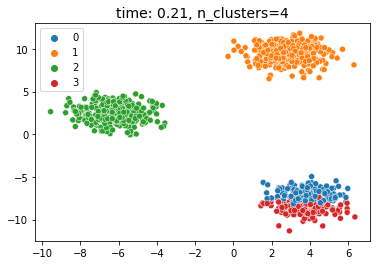

In [264]:
import time
start = time.time()
model = KMeans(4)
clusters = model.train(x_train)
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters, palette = "tab10")
wt = time.time() - start
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 4), fontsize=14)

Text(0.5, 1.0, 'Predict')

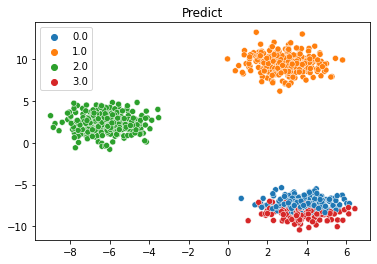

In [265]:
clusters_test = model.predict(x_test)
graph = sns.scatterplot(x=x_test[:,0], y=x_test[:,1], hue=clusters_test, palette = "tab10")
graph.set_title('Predict')

# Сравнение работы алгоритма KMeans с GaussianMixture и DBSCAN

In [266]:
import numpy as np
from sklearn.mixture import GaussianMixture

Text(0.5, 1.0, 'time: 0.02, n_clusters=2')

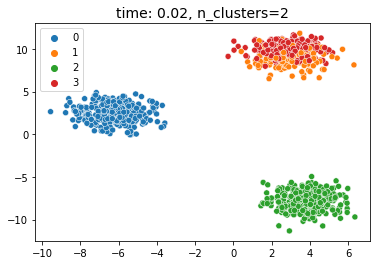

In [288]:
start = time.time()
gm = GaussianMixture(n_components=4, random_state=0).fit(x_train)
clusters_test = gm.predict(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters_test, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 2), fontsize=14)

Text(0.5, 1.0, 'time: 0.07, n_clusters=3, eps=0.97, min_samples=5')

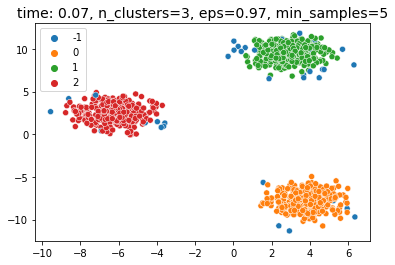

In [290]:
from sklearn.cluster import DBSCAN
start = time.time()
clustering = DBSCAN(eps=0.97, min_samples=5).fit(x_train)
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clustering.labels_, palette = "tab10")
wt = time.time() - start
graph.set_title('time: %.2f, n_clusters=%s, eps=%s, min_samples=%s'%(wt, 3, 0.97, 5), fontsize=14)

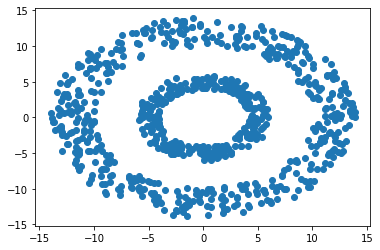

In [155]:
import numpy as np
import matplotlib.pyplot as plt
 
r_1   = np.random.uniform(10, 14, 500)
phi_1 = np.random.uniform(0, 2 * np.pi, 500)
 
r_2   = np.random.uniform(4, 6, 300)
phi_2 = np.random.uniform(0, 2 * np.pi, 300)
 
x_train = np.array([np.concatenate([r_1 * np.cos(phi_1), r_2 * np.cos(phi_2)]), np.concatenate([r_1 * np.sin(phi_1), r_2 * np.sin(phi_2)])]).T
 
plt.scatter(x=x_train[:,0], y=x_train[:,1])



Number of iterations:  8


Text(0.5, 1.0, 'time: 0.10, n_clusters=2')

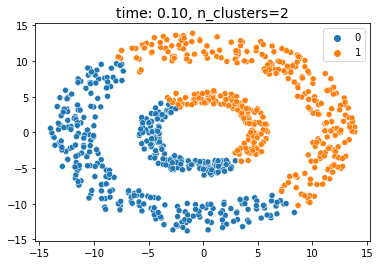

In [160]:
import time
start = time.time()
model = KMeans(2)
clusters = model.train(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 2), fontsize=14)

Text(0.5, 1.0, 'time: 0.01, n_clusters=2')

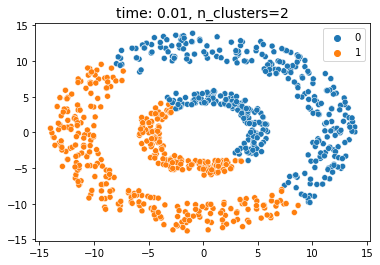

In [157]:
start = time.time()
gm = GaussianMixture(n_components=2, random_state=0).fit(x_train)
clusters_test = gm.predict(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters_test, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 2), fontsize=14)

Text(0.5, 1.0, 'time: 0.01, n_clusters=2, eps=3, min_samples=2')

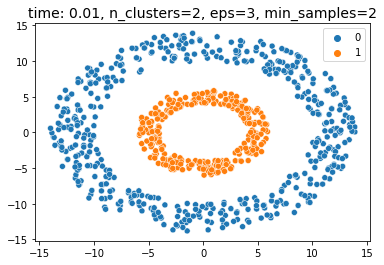

In [159]:
from sklearn.cluster import DBSCAN
start = time.time()
clustering = DBSCAN(eps=3, min_samples=2).fit(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clustering.labels_, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s, eps=%s, min_samples=%s'%(wt, 2, 3, 2), fontsize=14)


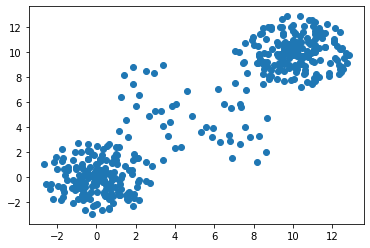

In [161]:
r_1   = np.random.uniform(0, 3, 200)
phi_1 = np.random.uniform(0, 2 * np.pi, 200)
 
r_2   = np.random.uniform(0, 3, 200)
phi_2 = np.random.uniform(0, 2 * np.pi, 200)

x1 = np.random.uniform(1, 9, 50)
y1 = np.random.uniform(1, 9, 50)
 
x_train = np.array([np.concatenate([x1, 10+r_1 * np.cos(phi_1), r_2 * np.cos(phi_2)]), np.concatenate([y1, 10+r_1 * np.sin(phi_1), r_2 * np.sin(phi_2)])]).T
 
plt.scatter(x=x_train[:,0], y=x_train[:,1])

Number of iterations:  2


Text(0.5, 1.0, 'time: 0.02, n_clusters=2')

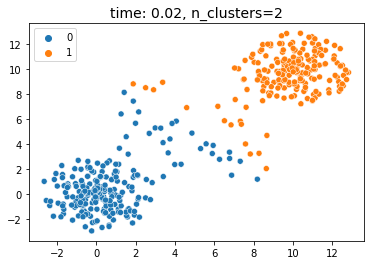

In [164]:
import time
start = time.time()
model = KMeans(2)
clusters = model.train(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 2), fontsize=14)

Text(0.5, 1.0, 'time: 0.01, n_clusters=2')

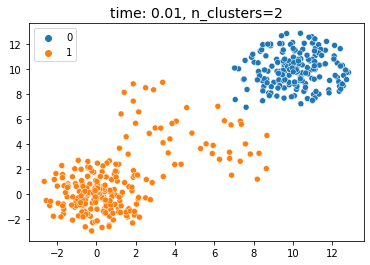

In [167]:
start = time.time()
gm = GaussianMixture(n_components=2, random_state=0).fit(x_train)
clusters_test = gm.predict(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters_test, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 2), fontsize=14)

Text(0.5, 1.0, 'time: 0.01, n_clusters=2, eps=3, min_samples=2')

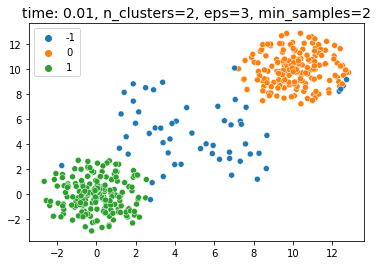

In [186]:
from sklearn.cluster import DBSCAN
start = time.time()
clustering = DBSCAN(eps=1.39, min_samples=40).fit(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clustering.labels_, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s, eps=%s, min_samples=%s'%(wt, 2, 3, 2), fontsize=14)

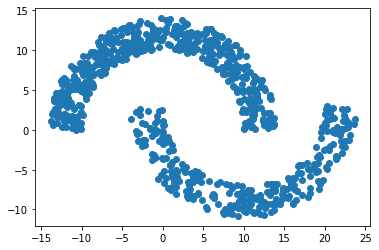

In [187]:
r_1   = np.random.uniform(10, 14, 500)
phi_1 = np.random.uniform(0, np.pi, 500)
 
r_2   = np.random.uniform(10, 14, 300)
phi_2 = np.random.uniform(np.pi, 2*np.pi, 300)
 
x_train = np.array([np.concatenate([r_1 * np.cos(phi_1),10+r_2 * np.cos(phi_2)]), np.concatenate([r_1 * np.sin(phi_1), 3+r_2 * np.sin(phi_2)])]).T
 
plt.scatter(x=x_train[:,0], y=x_train[:,1])

Number of iterations:  6


Text(0.5, 1.0, 'time: 0.09, n_clusters=2')

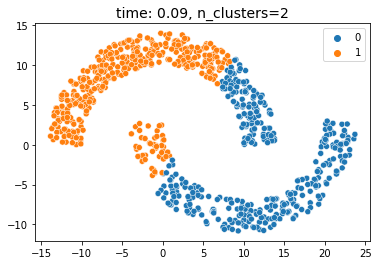

In [188]:
import time
start = time.time()
model = KMeans(2)
clusters = model.train(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 2), fontsize=14)

Text(0.5, 1.0, 'time: 0.03, n_clusters=2')

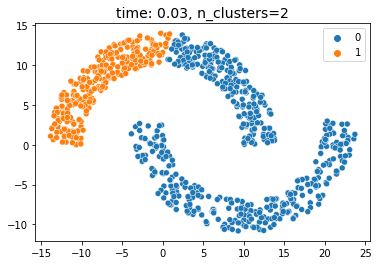

In [189]:
start = time.time()
gm = GaussianMixture(n_components=2, random_state=0).fit(x_train)
clusters_test = gm.predict(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters_test, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 2), fontsize=14)

Text(0.5, 1.0, 'time: 0.01, n_clusters=2, eps=6.0, min_samples=140')

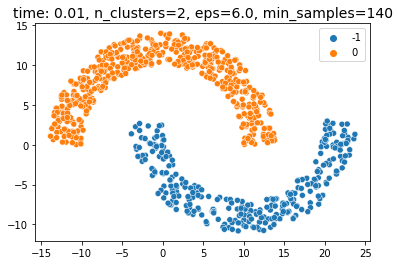

In [245]:
from sklearn.cluster import DBSCAN
start = time.time()
clustering = DBSCAN(eps=6.0, min_samples=140).fit(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clustering.labels_, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s, eps=%s, min_samples=%s'%(wt, 2, 6.0, 140), fontsize=14)

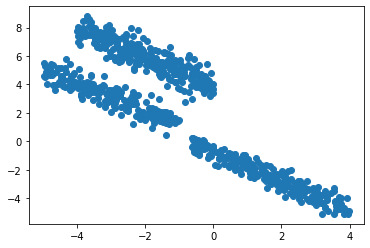

In [246]:
x1 = np.random.uniform(-5, -1, 200)
x2 = np.random.uniform(-4, 0, 300)
x3 = np.random.uniform(-0.7, 4, 250)

y1 = -x1 + np.random.normal(0.1, 0.5, 200)
y2 = -x2 + 4 +np.random.normal(-0.1, 0.6, 300)
y3 = -x3 - 1 + np.random.normal(0.2, 0.4, 250)

x_train = np.array([np.concatenate([x1, x2, x3]), np.concatenate([y1, y2, y3])]).T
 
plt.scatter(x=x_train[:,0], y=x_train[:,1])

Number of iterations:  7


Text(0.5, 1.0, 'time: 0.09, n_clusters=3')

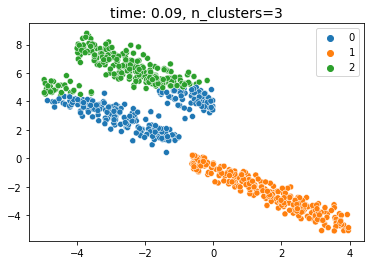

In [252]:
import time
start = time.time()
model = KMeans(3)
clusters = model.train(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 3), fontsize=14)

Text(0.5, 1.0, 'time: 0.02, n_clusters=3')

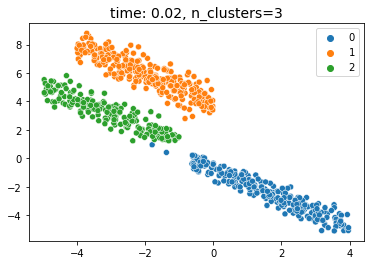

In [253]:
start = time.time()
gm = GaussianMixture(n_components=3, random_state=0).fit(x_train)
clusters_test = gm.predict(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters_test, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s'%(wt, 3), fontsize=14)

Text(0.5, 1.0, 'time: 0.01, n_clusters=3, eps=0.65, min_samples=25')

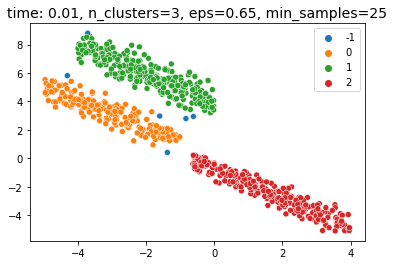

In [254]:
from sklearn.cluster import DBSCAN
start = time.time()
clustering = DBSCAN(eps=0.65, min_samples=25).fit(x_train)
wt = time.time() - start
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clustering.labels_, palette = "tab10")
graph.set_title('time: %.2f, n_clusters=%s, eps=%s, min_samples=%s'%(wt, 3, 0.65, 25), fontsize=14)

Number of iterations:  3


Text(0.5, 1.0, 'Train')

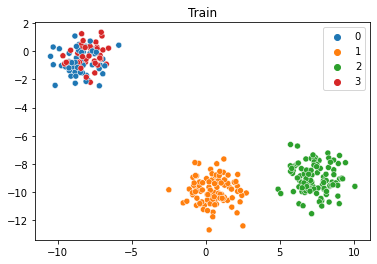

In [5]:
data, _ = make_blobs(n_samples=600, n_features=3, centers=None)
x_train = data[:300]
x_test = data[300:]


model = KMeans(4)
clusters = model.train(x_train)
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters, palette = "tab10")
graph.set_title('Train')

In [15]:
import time
from sklearn.cluster import KMeans
array1 = []
for i in range(10000,200001,10000):
    x_train, _ = make_blobs(n_samples=i, n_features=3, centers=None)
    start = time.time()
    model = KMeans(n_clusters=3, random_state=0)
    model.fit(x_train)
    array1.append(time.time() - start)

Text(0.5, 1.0, 'Train')

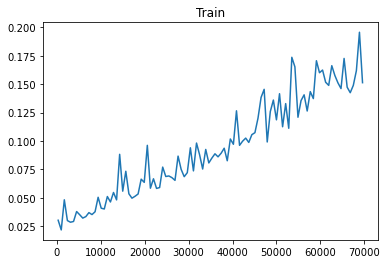

In [17]:
#print(array)
graph = sns.lineplot(x=range(10000,20001,10000), y=array1, palette = "tab10")
graph.set_title('Train')
graph.set_xlabel('N <= 200000')
graph.set_ylabel('time,s')

Text(0.5, 1.0, 'Predict')

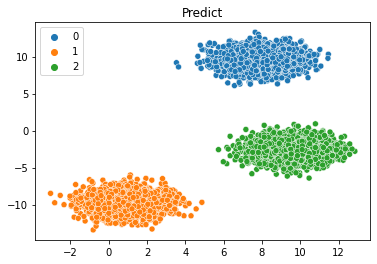

In [33]:
import numpy as np
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=0).fit(x_train)
clusters_test = gm.predict(x_train)
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clusters_test, palette = "tab10")
graph.set_title('Train')

In [36]:
import time
from sklearn.mixture import GaussianMixture
array2 = []
for i in range(10000,200001,10000):
    x_train, _ = make_blobs(n_samples=i, n_features=3, centers=None)
    start = time.time()
    model = GaussianMixture(n_components=3, random_state=0)
    model.fit_predict(x_train)
    array2.append(time.time() - start)
    

Text(0.5, 1.0, 'Predict')

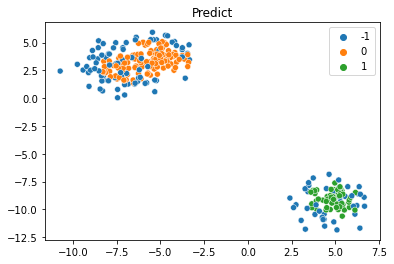

In [26]:
data, _ = make_blobs(n_samples=600, n_features=3, centers=None)
x_train = data[:300]
x_test = data[300:]

clustering = DBSCAN(eps=1.39, min_samples=40).fit(x_train) #0.65 10
graph = sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=clustering.labels_, palette = "tab10")
graph.set_title('Train')

In [30]:
import time
from sklearn.cluster import DBSCAN
array3 = []
for i in range(10000,200001,10000):
    x_train, _ = make_blobs(n_samples=i, n_features=3, centers=None)
    start = time.time()
    model = DBSCAN(eps=1.39, min_samples=40)
    model.fit(x_train)
    array3.append(time.time() - start)
    

Text(0.5, 1.0, 'Train')

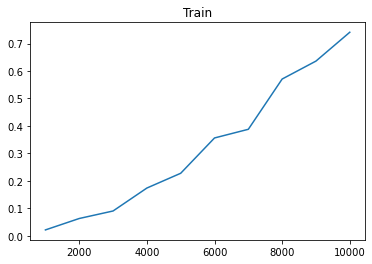

In [32]:
#print(array)
graph = sns.lineplot(x=range(10000,200001,10000), y=array3, palette = "tab10")
graph.set_title('Train')
graph.set_xlabel('N <= 200000')
graph.set_ylabel('time,s')